# Image Processing Operations: Mathematical Explanations and Demonstrations

This notebook provides comprehensive explanations of fundamental image processing operations including:
1. **Filtering and Convolution** (Gaussian Blur, Sobel Operator)
2. **Morphological Operations** (Erosion, Dilation, Opening, Closing)
3. **Histogram Equalization**

Each section includes mathematical formulations and practical demonstrations with varying intensity levels.

In [1]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

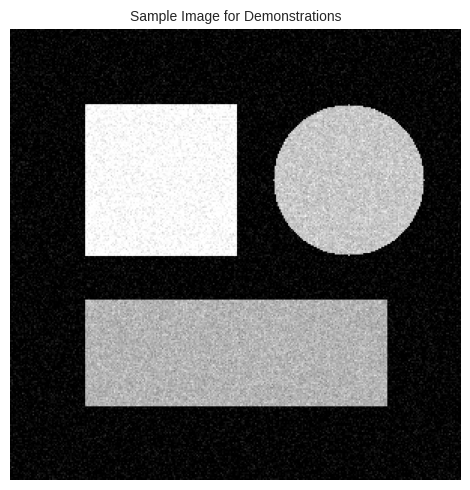

In [2]:
# Helper function to display multiple images
def display_images(images, titles, figsize=(15, 5), cmap='gray'):
    """
    Display multiple images in a row
    
    Args:
        images: List of images to display
        titles: List of titles for each image
        figsize: Figure size (width, height)
        cmap: Colormap to use
    """
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes]
    
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(img, cmap=cmap)
        axes[i].set_title(title, fontsize=10)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Create a sample image for demonstrations
def create_sample_image():
    """Create a sample image with various features for demonstration"""
    img = np.zeros((300, 300), dtype=np.uint8)
    
    # Add shapes
    cv2.rectangle(img, (50, 50), (150, 150), 255, -1)
    cv2.circle(img, (225, 100), 50, 200, -1)
    cv2.rectangle(img, (50, 180), (250, 250), 180, -1)
    
    # Add noise
    noise = np.random.normal(0, 15, img.shape)
    img = np.clip(img.astype(np.float32) + noise, 0, 255).astype(np.uint8)
    
    return img

# Create and display sample image
sample_img = create_sample_image()
display_images([sample_img], ['Sample Image for Demonstrations'])

---
## 1. Filtering and Convolution

### Mathematical Foundation: Convolution

Convolution is a fundamental operation in image processing. For a 2D image $I$ and kernel $K$, the convolution operation is defined as:

$$
(I * K)(x, y) = \sum_{i=-a}^{a} \sum_{j=-b}^{b} I(x-i, y-j) \cdot K(i, j)
$$

where:
- $I(x, y)$ is the input image
- $K(i, j)$ is the kernel/filter
- $(2a+1) \times (2b+1)$ is the kernel size

The convolution operation slides the kernel over the image, computing a weighted sum at each position.

### 1.1 Gaussian Blur

#### Mathematical Explanation

Gaussian blur uses a Gaussian function as the convolution kernel. The 2D Gaussian function is:

$$
G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

where:
- $\sigma$ is the standard deviation (controls blur amount)
- $x, y$ are distances from the kernel center

**Properties:**
- Larger $\sigma$ → More blur
- Kernel size is typically $(6\sigma + 1) \times (6\sigma + 1)$ to capture 99.7% of the distribution
- The kernel values sum to 1 (normalized)

**OpenCV Function:**
```python
cv2.GaussianBlur(src, ksize, sigmaX, sigmaY, borderType)
```
- `src`: Input image
- `ksize`: Kernel size (width, height) - must be odd numbers
- `sigmaX`: Standard deviation in X direction
- `sigmaY`: Standard deviation in Y direction (if 0, set equal to sigmaX)
- `borderType`: Pixel extrapolation method

Gaussian Blur with Increasing Sigma Values
Sigma: 1 | Kernel size: 7x7
Sigma: 3 | Kernel size: 19x19
Sigma: 5 | Kernel size: 31x31
Sigma: 7 | Kernel size: 43x43
Sigma: 9 | Kernel size: 55x55


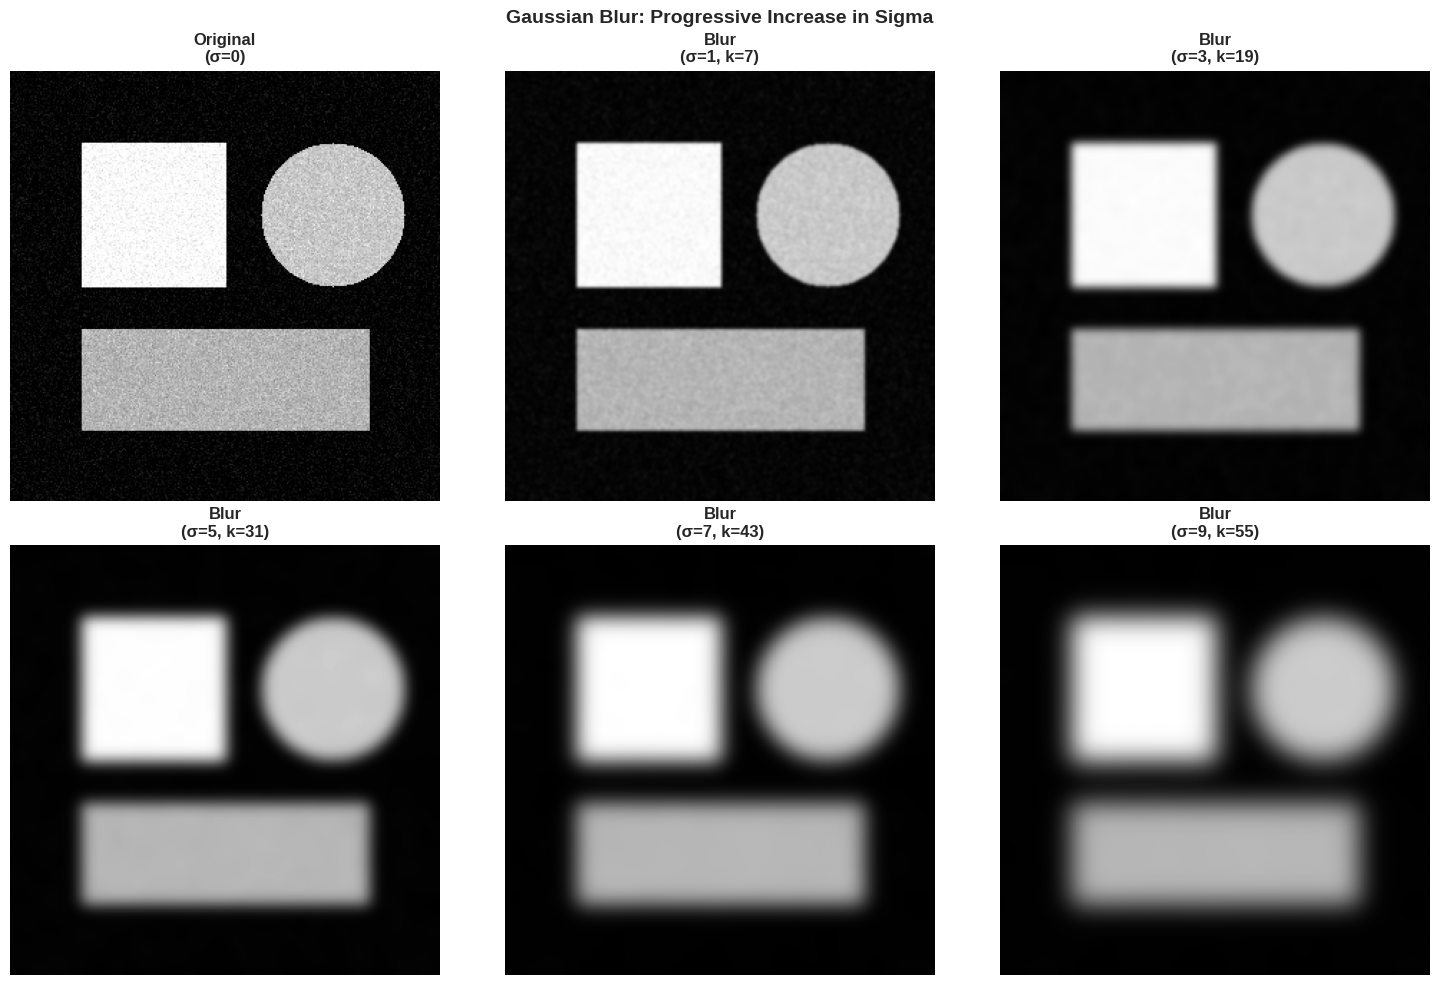

In [3]:
# Demonstration: Gradually increasing Gaussian Blur
print("Gaussian Blur with Increasing Sigma Values")
print("="*50)

# Different sigma values
sigma_values = [0, 1, 3, 5, 7, 9]
blurred_images = []
titles = []

for sigma in sigma_values:
    if sigma == 0:
        # Original image
        blurred = sample_img.copy()
        titles.append('Original\n(σ=0)')
    else:
        # Calculate appropriate kernel size
        ksize = int(6 * sigma + 1)
        if ksize % 2 == 0:
            ksize += 1
        
        blurred = cv2.GaussianBlur(sample_img, (ksize, ksize), sigma)
        titles.append(f'Blur\n(σ={sigma}, k={ksize})')
        print(f"Sigma: {sigma} | Kernel size: {ksize}x{ksize}")
    
    blurred_images.append(blurred)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (img, title) in enumerate(zip(blurred_images, titles)):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title, fontsize=12, fontweight='bold')
    axes[i].axis('off')

plt.suptitle('Gaussian Blur: Progressive Increase in Sigma', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

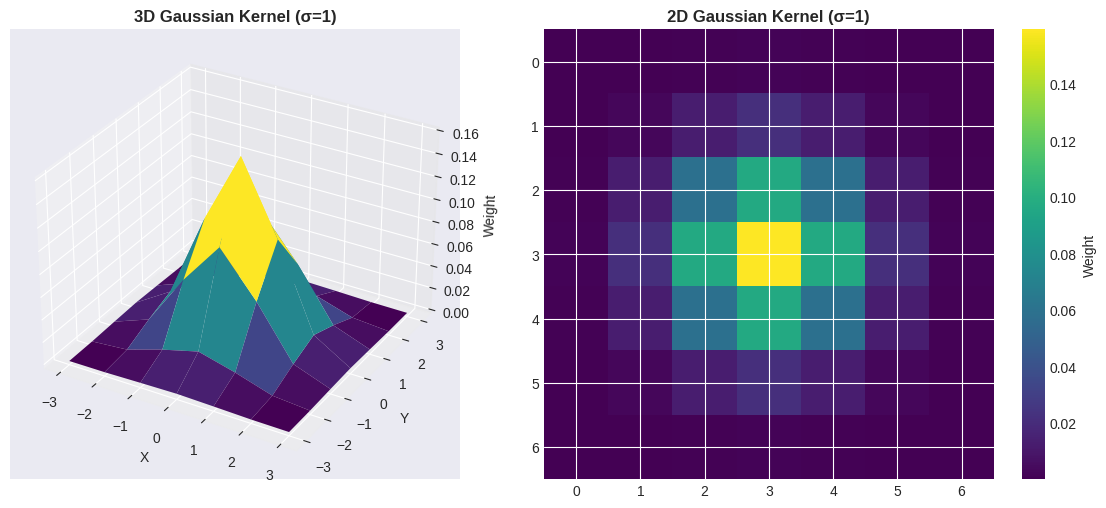


Kernel statistics:
  Sum of weights: 1.000000 (should be ~1.0)
  Max weight: 0.159241
  Center weight: 0.159241


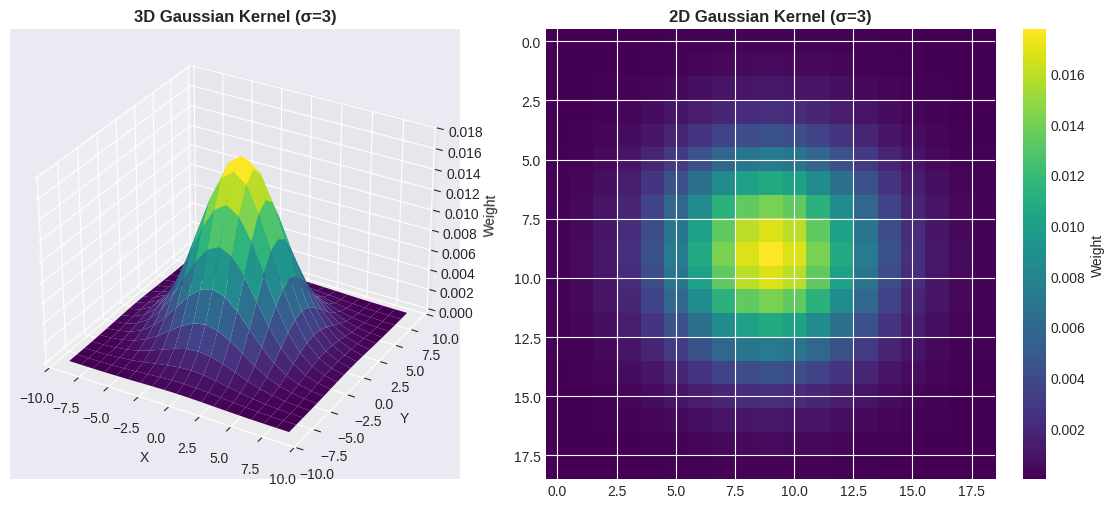


Kernel statistics:
  Sum of weights: 1.000000 (should be ~1.0)
  Max weight: 0.017736
  Center weight: 0.017736


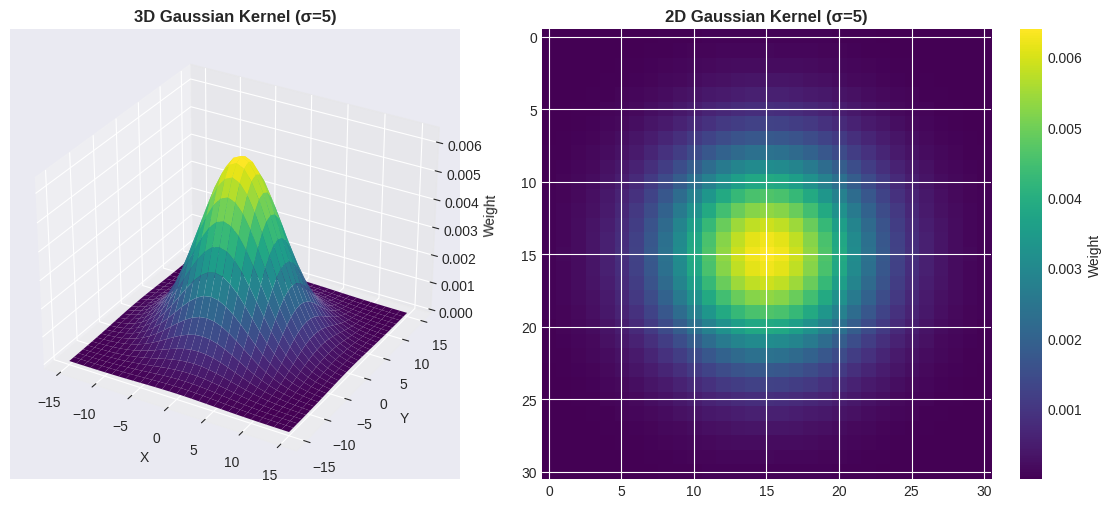


Kernel statistics:
  Sum of weights: 1.000000 (should be ~1.0)
  Max weight: 0.006390
  Center weight: 0.006390


In [4]:
# Visualize the Gaussian kernel itself
def visualize_gaussian_kernel(sigma, kernel_size):
    """
    Visualize a Gaussian kernel in 3D
    """
    # Create kernel
    ax = np.arange(-kernel_size // 2 + 1, kernel_size // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)  # Normalize
    
    # Create 3D plot
    fig = plt.figure(figsize=(12, 5))
    
    # 3D surface plot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(xx, yy, kernel, cmap='viridis')
    ax1.set_title(f'3D Gaussian Kernel (σ={sigma})', fontweight='bold')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Weight')
    
    # 2D heatmap
    ax2 = fig.add_subplot(122)
    im = ax2.imshow(kernel, cmap='viridis', interpolation='nearest')
    ax2.set_title(f'2D Gaussian Kernel (σ={sigma})', fontweight='bold')
    plt.colorbar(im, ax=ax2, label='Weight')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nKernel statistics:")
    print(f"  Sum of weights: {np.sum(kernel):.6f} (should be ~1.0)")
    print(f"  Max weight: {np.max(kernel):.6f}")
    print(f"  Center weight: {kernel[kernel_size//2, kernel_size//2]:.6f}")

# Visualize kernels for different sigma values
for sigma in [1, 3, 5]:
    ksize = int(6 * sigma + 1)
    if ksize % 2 == 0:
        ksize += 1
    visualize_gaussian_kernel(sigma, ksize)

### 1.2 Sobel Operator (Edge Detection)

#### Mathematical Explanation

The Sobel operator computes the image gradient approximation using convolution. It detects edges by finding regions of high intensity change.

**Gradient Calculation:**

The gradient of an image $I$ at position $(x, y)$ is a 2D vector:

$$
\nabla I = \begin{bmatrix} G_x \\ G_y \end{bmatrix} = \begin{bmatrix} \frac{\partial I}{\partial x} \\ \frac{\partial I}{\partial y} \end{bmatrix}
$$

**Sobel Kernels:**

Horizontal gradient (detects vertical edges):
$$
G_x = \begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix} * I
$$

Vertical gradient (detects horizontal edges):
$$
G_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ +1 & +2 & +1 \end{bmatrix} * I
$$

**Gradient Magnitude and Direction:**

$$
G = \sqrt{G_x^2 + G_y^2}
$$

$$
\theta = \arctan\left(\frac{G_y}{G_x}\right)
$$

**OpenCV Function:**
```python
cv2.Sobel(src, ddepth, dx, dy, ksize, scale, delta, borderType)
```
- `src`: Input image
- `ddepth`: Output image depth (e.g., cv2.CV_64F for float64)
- `dx`: Order of derivative in x (0, 1, or 2)
- `dy`: Order of derivative in y (0, 1, or 2)
- `ksize`: Kernel size (1, 3, 5, or 7)
- `scale`: Optional scale factor for computed derivatives
- `delta`: Optional delta added to results

Sobel Edge Detection with Varying Kernel Sizes
Kernel size: 3x3
  Gradient X range: [-540.00, 543.00]
  Gradient Y range: [-545.00, 543.00]
  Magnitude range: [0, 255]
Kernel size: 5x5
  Gradient X range: [-7847.00, 7898.00]
  Gradient Y range: [-7892.00, 7891.00]
  Magnitude range: [0, 255]
Kernel size: 7x7
  Gradient X range: [-115476.00, 116115.00]
  Gradient Y range: [-115842.00, 115967.00]
  Magnitude range: [0, 255]


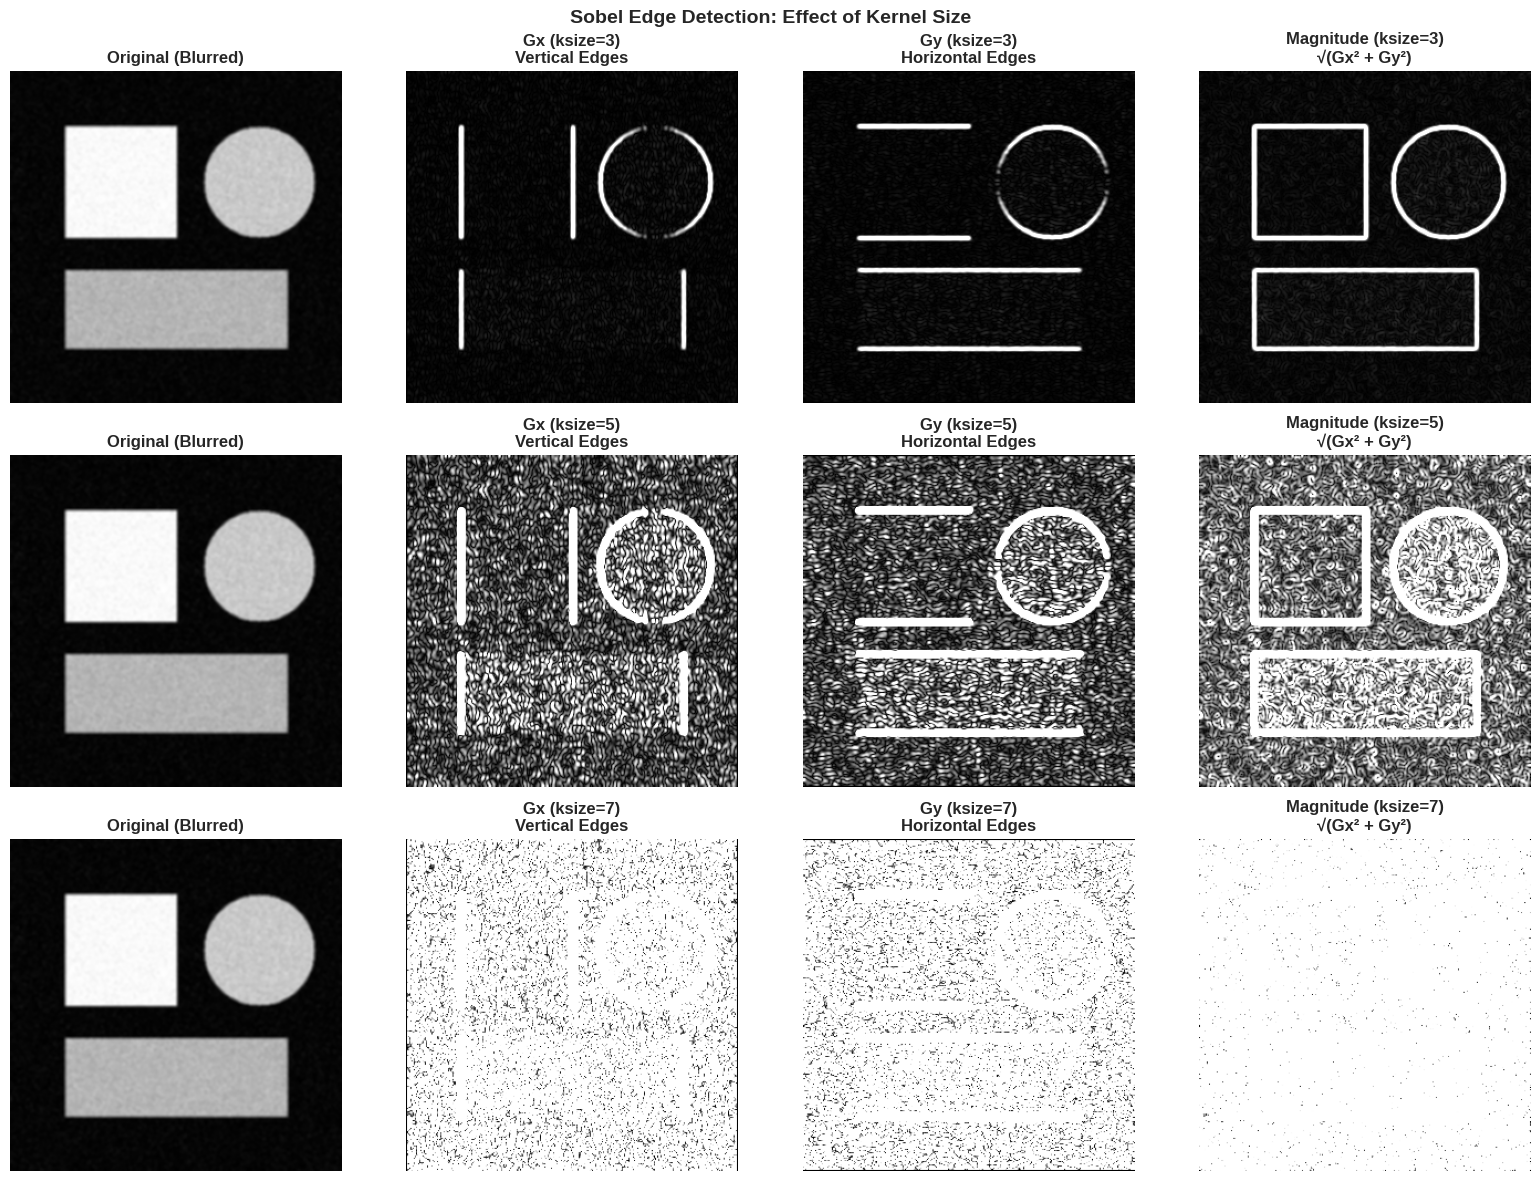

In [5]:
# Demonstration: Sobel operator with different kernel sizes
print("Sobel Edge Detection with Varying Kernel Sizes")
print("="*50)

# Apply Gaussian blur first to reduce noise (common preprocessing)
img_blur = cv2.GaussianBlur(sample_img, (5, 5), 1.4)

kernel_sizes = [3, 5, 7]
results = []

for ksize in kernel_sizes:
    # Compute gradients in x and y directions
    grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=ksize)
    grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=ksize)
    
    # Compute gradient magnitude
    grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    grad_magnitude = np.uint8(np.clip(grad_magnitude, 0, 255))
    
    # Compute gradient direction
    grad_direction = np.arctan2(grad_y, grad_x)
    
    results.append({
        'ksize': ksize,
        'grad_x': np.uint8(np.clip(np.abs(grad_x), 0, 255)),
        'grad_y': np.uint8(np.clip(np.abs(grad_y), 0, 255)),
        'magnitude': grad_magnitude,
        'direction': grad_direction
    })
    
    print(f"Kernel size: {ksize}x{ksize}")
    print(f"  Gradient X range: [{grad_x.min():.2f}, {grad_x.max():.2f}]")
    print(f"  Gradient Y range: [{grad_y.min():.2f}, {grad_y.max():.2f}]")
    print(f"  Magnitude range: [{grad_magnitude.min()}, {grad_magnitude.max()}]")

# Display results for different kernel sizes
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

for i, result in enumerate(results):
    ksize = result['ksize']
    
    axes[i, 0].imshow(img_blur, cmap='gray')
    axes[i, 0].set_title(f'Original (Blurred)', fontweight='bold')
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(result['grad_x'], cmap='gray')
    axes[i, 1].set_title(f'Gx (ksize={ksize})\nVertical Edges', fontweight='bold')
    axes[i, 1].axis('off')
    
    axes[i, 2].imshow(result['grad_y'], cmap='gray')
    axes[i, 2].set_title(f'Gy (ksize={ksize})\nHorizontal Edges', fontweight='bold')
    axes[i, 2].axis('off')
    
    axes[i, 3].imshow(result['magnitude'], cmap='gray')
    axes[i, 3].set_title(f'Magnitude (ksize={ksize})\n√(Gx² + Gy²)', fontweight='bold')
    axes[i, 3].axis('off')

plt.suptitle('Sobel Edge Detection: Effect of Kernel Size', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

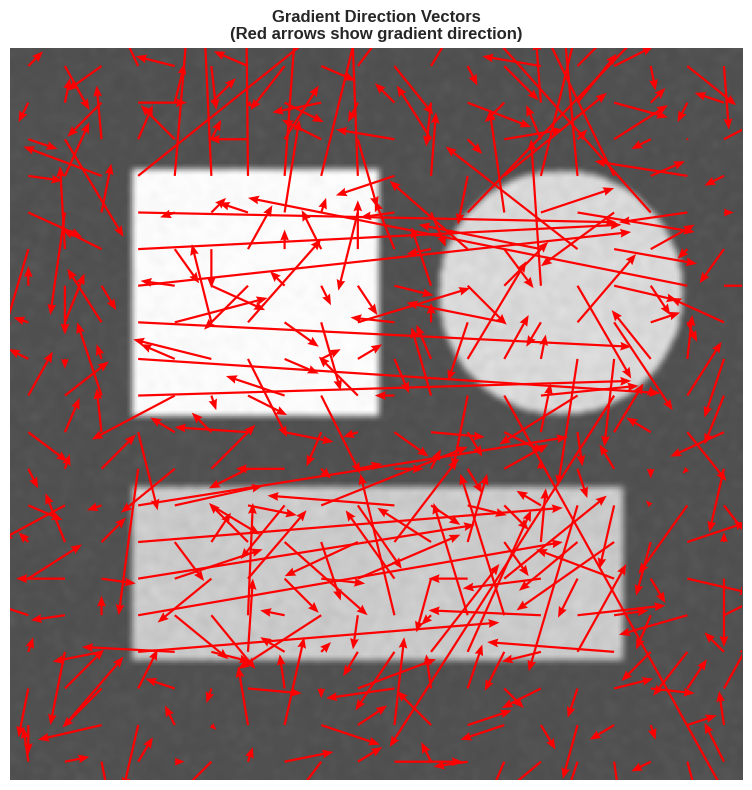

In [6]:
# Visualize gradient direction
def visualize_gradient_direction(image, grad_x, grad_y, step=20):
    """
    Visualize gradient direction using arrow plot
    """
    h, w = image.shape
    y, x = np.mgrid[step//2:h:step, step//2:w:step]
    
    # Sample gradients at grid points
    u = grad_x[y, x]
    v = grad_y[y, x]
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(image, cmap='gray', alpha=0.7)
    ax.quiver(x, y, u, -v, angles='xy', scale_units='xy', scale=0.5, 
              color='red', width=0.003, headwidth=4, headlength=5)
    ax.set_title('Gradient Direction Vectors\n(Red arrows show gradient direction)', 
                 fontsize=12, fontweight='bold')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# Compute gradients for visualization
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)

visualize_gradient_direction(img_blur, grad_x, grad_y, step=15)

---
## 2. Morphological Operations

### Mathematical Foundation

Morphological operations are based on set theory and operate on binary images (or grayscale). They use a **structuring element** (kernel) that probes the image.

Let:
- $A$ = input image (set of foreground pixels)
- $B$ = structuring element
- $B_x$ = structuring element translated to position $x$

### 2.1 Erosion

#### Mathematical Definition

Erosion shrinks objects by removing pixels on object boundaries.

$$
A \ominus B = \{x : B_x \subseteq A\}
$$

**Interpretation:** 
- A pixel is set to 1 only if ALL pixels under the structuring element are 1
- Removes small noise, separates objects, and shrinks boundaries

**OpenCV Function:**
```python
cv2.erode(src, kernel, iterations, borderType, borderValue)
```
- `src`: Input image
- `kernel`: Structuring element
- `iterations`: Number of times erosion is applied
- More iterations = more erosion

### 2.2 Dilation

#### Mathematical Definition

Dilation expands objects by adding pixels to object boundaries.

$$
A \oplus B = \{x : B_x \cap A \neq \emptyset\}
$$

**Interpretation:**
- A pixel is set to 1 if ANY pixel under the structuring element is 1
- Fills small holes, connects nearby objects, and expands boundaries

**OpenCV Function:**
```python
cv2.dilate(src, kernel, iterations, borderType, borderValue)
```
- Parameters same as erosion
- More iterations = more dilation

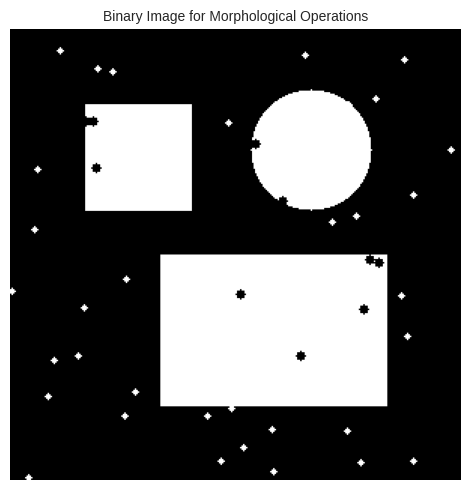

In [7]:
# Create a binary image for morphological operations
def create_morphology_test_image():
    """Create a test image with noise and gaps"""
    img = np.zeros((300, 300), dtype=np.uint8)
    
    # Add main shapes
    cv2.rectangle(img, (50, 50), (120, 120), 255, -1)
    cv2.circle(img, (200, 80), 40, 255, -1)
    cv2.rectangle(img, (100, 150), (250, 250), 255, -1)
    
    # Add small noise (salt noise)
    noise_points = np.random.randint(0, 300, (50, 2))
    for point in noise_points:
        cv2.circle(img, tuple(point), 2, 255, -1)
    
    # Add small gaps in objects
    for _ in range(20):
        x, y = np.random.randint(50, 250), np.random.randint(50, 250)
        if img[y, x] == 255:
            cv2.circle(img, (x, y), 3, 0, -1)
    
    return img

morph_img = create_morphology_test_image()
display_images([morph_img], ['Binary Image for Morphological Operations'])

Erosion: Progressive Iterations

Structuring element shape: 2 (Ellipse)
Structuring element size: 5x5

Kernel matrix:
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]

Iterations: 1 | Foreground pixels: 22699
Iterations: 2 | Foreground pixels: 20435
Iterations: 3 | Foreground pixels: 18222
Iterations: 4 | Foreground pixels: 16103
Iterations: 5 | Foreground pixels: 14046


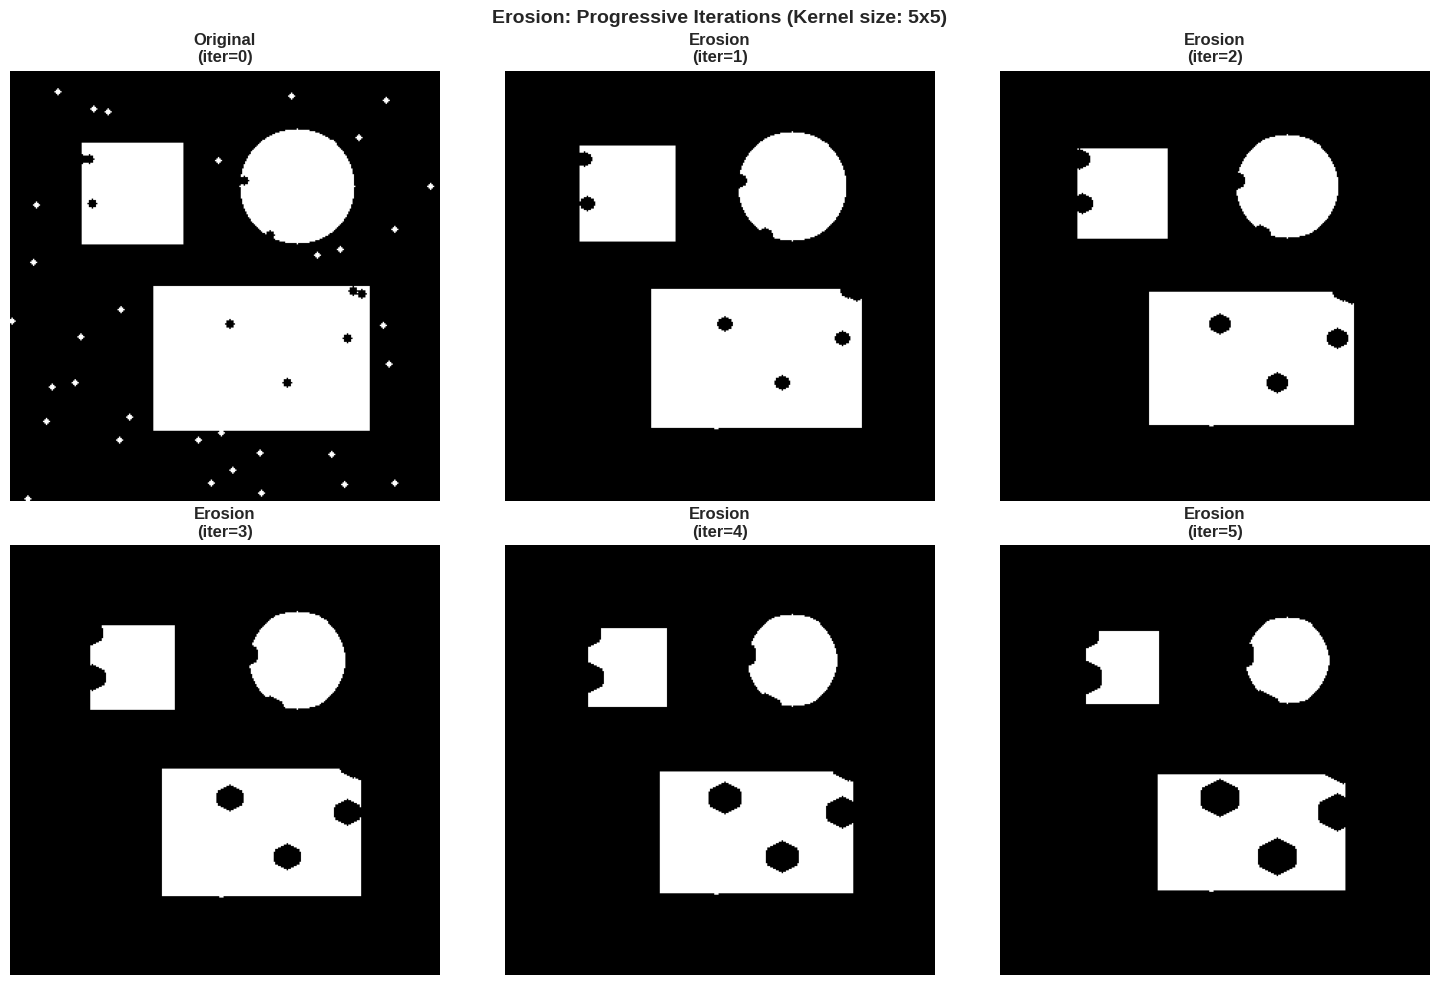

In [8]:
# Demonstration: Erosion with increasing iterations
print("Erosion: Progressive Iterations")
print("="*50)

# Create structuring element
kernel_size = 5
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

print(f"\nStructuring element shape: {cv2.MORPH_ELLIPSE} (Ellipse)")
print(f"Structuring element size: {kernel_size}x{kernel_size}")
print(f"\nKernel matrix:\n{kernel}\n")

iterations_list = [0, 1, 2, 3, 4, 5]
eroded_images = []
titles = []

for iters in iterations_list:
    if iters == 0:
        eroded = morph_img.copy()
        titles.append('Original\n(iter=0)')
    else:
        eroded = cv2.erode(morph_img, kernel, iterations=iters)
        titles.append(f'Erosion\n(iter={iters})')
        
        # Count foreground pixels
        fg_pixels = np.sum(eroded > 0)
        print(f"Iterations: {iters} | Foreground pixels: {fg_pixels}")
    
    eroded_images.append(eroded)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (img, title) in enumerate(zip(eroded_images, titles)):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title, fontsize=12, fontweight='bold')
    axes[i].axis('off')

plt.suptitle(f'Erosion: Progressive Iterations (Kernel size: {kernel_size}x{kernel_size})', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Dilation: Progressive Iterations
Iterations: 1 | Foreground pixels: 29077
Iterations: 2 | Foreground pixels: 33272
Iterations: 3 | Foreground pixels: 38054
Iterations: 4 | Foreground pixels: 43199
Iterations: 5 | Foreground pixels: 48571


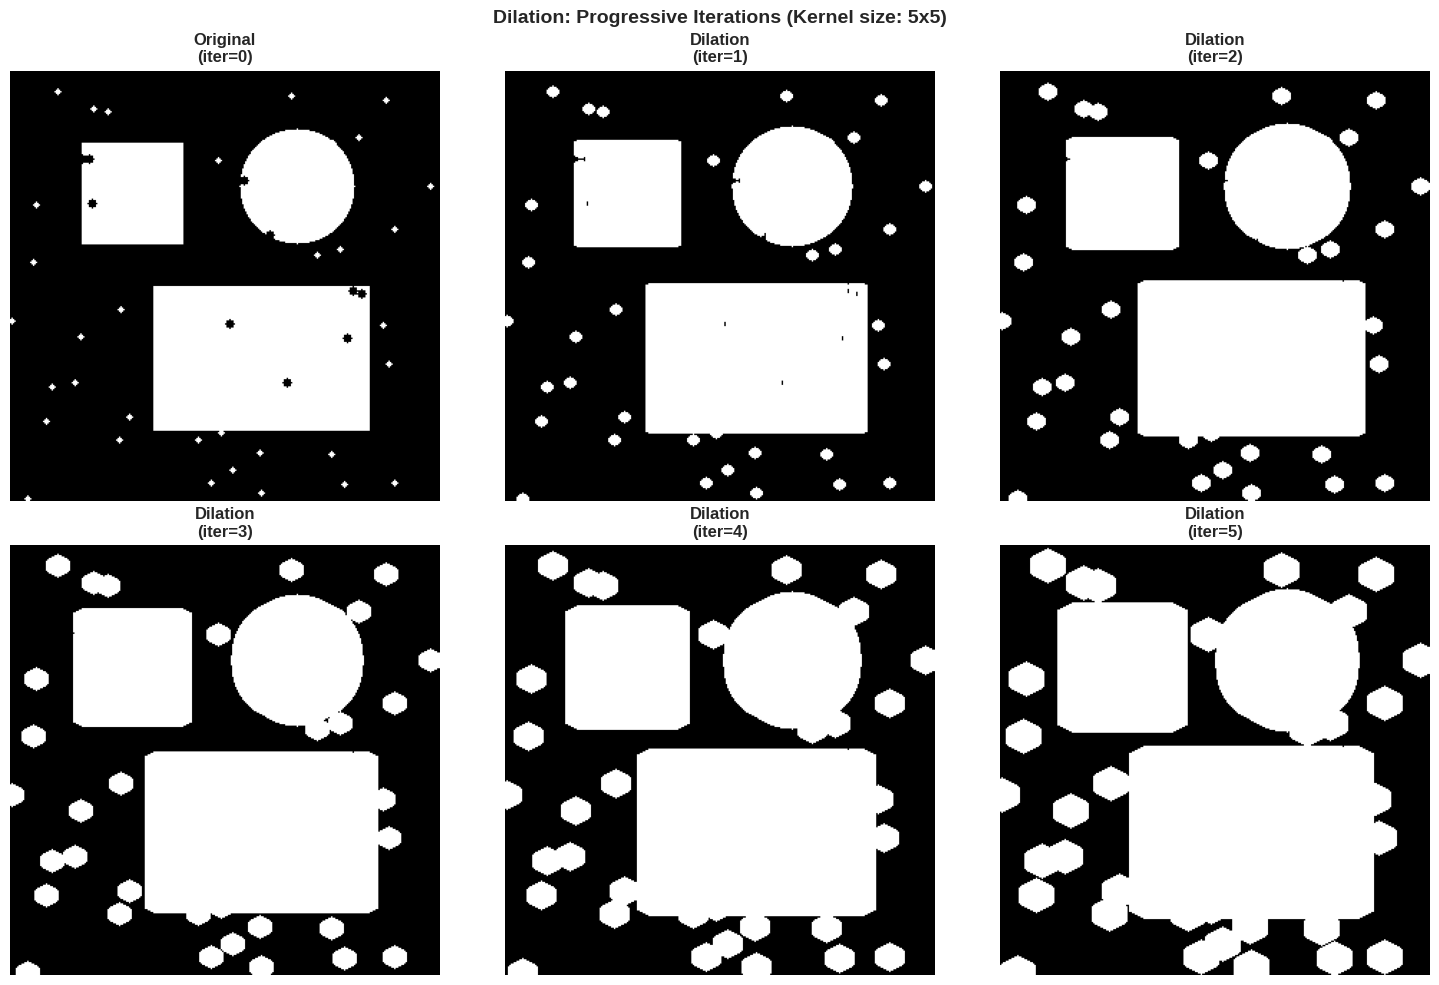

In [9]:
# Demonstration: Dilation with increasing iterations
print("Dilation: Progressive Iterations")
print("="*50)

dilated_images = []
titles = []

for iters in iterations_list:
    if iters == 0:
        dilated = morph_img.copy()
        titles.append('Original\n(iter=0)')
    else:
        dilated = cv2.dilate(morph_img, kernel, iterations=iters)
        titles.append(f'Dilation\n(iter={iters})')
        
        # Count foreground pixels
        fg_pixels = np.sum(dilated > 0)
        print(f"Iterations: {iters} | Foreground pixels: {fg_pixels}")
    
    dilated_images.append(dilated)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (img, title) in enumerate(zip(dilated_images, titles)):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title, fontsize=12, fontweight='bold')
    axes[i].axis('off')

plt.suptitle(f'Dilation: Progressive Iterations (Kernel size: {kernel_size}x{kernel_size})', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Effect of Different Structuring Elements

Rectangle Kernel (7x7):
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]

Ellipse Kernel (7x7):
[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]

Cross Kernel (7x7):
[[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]


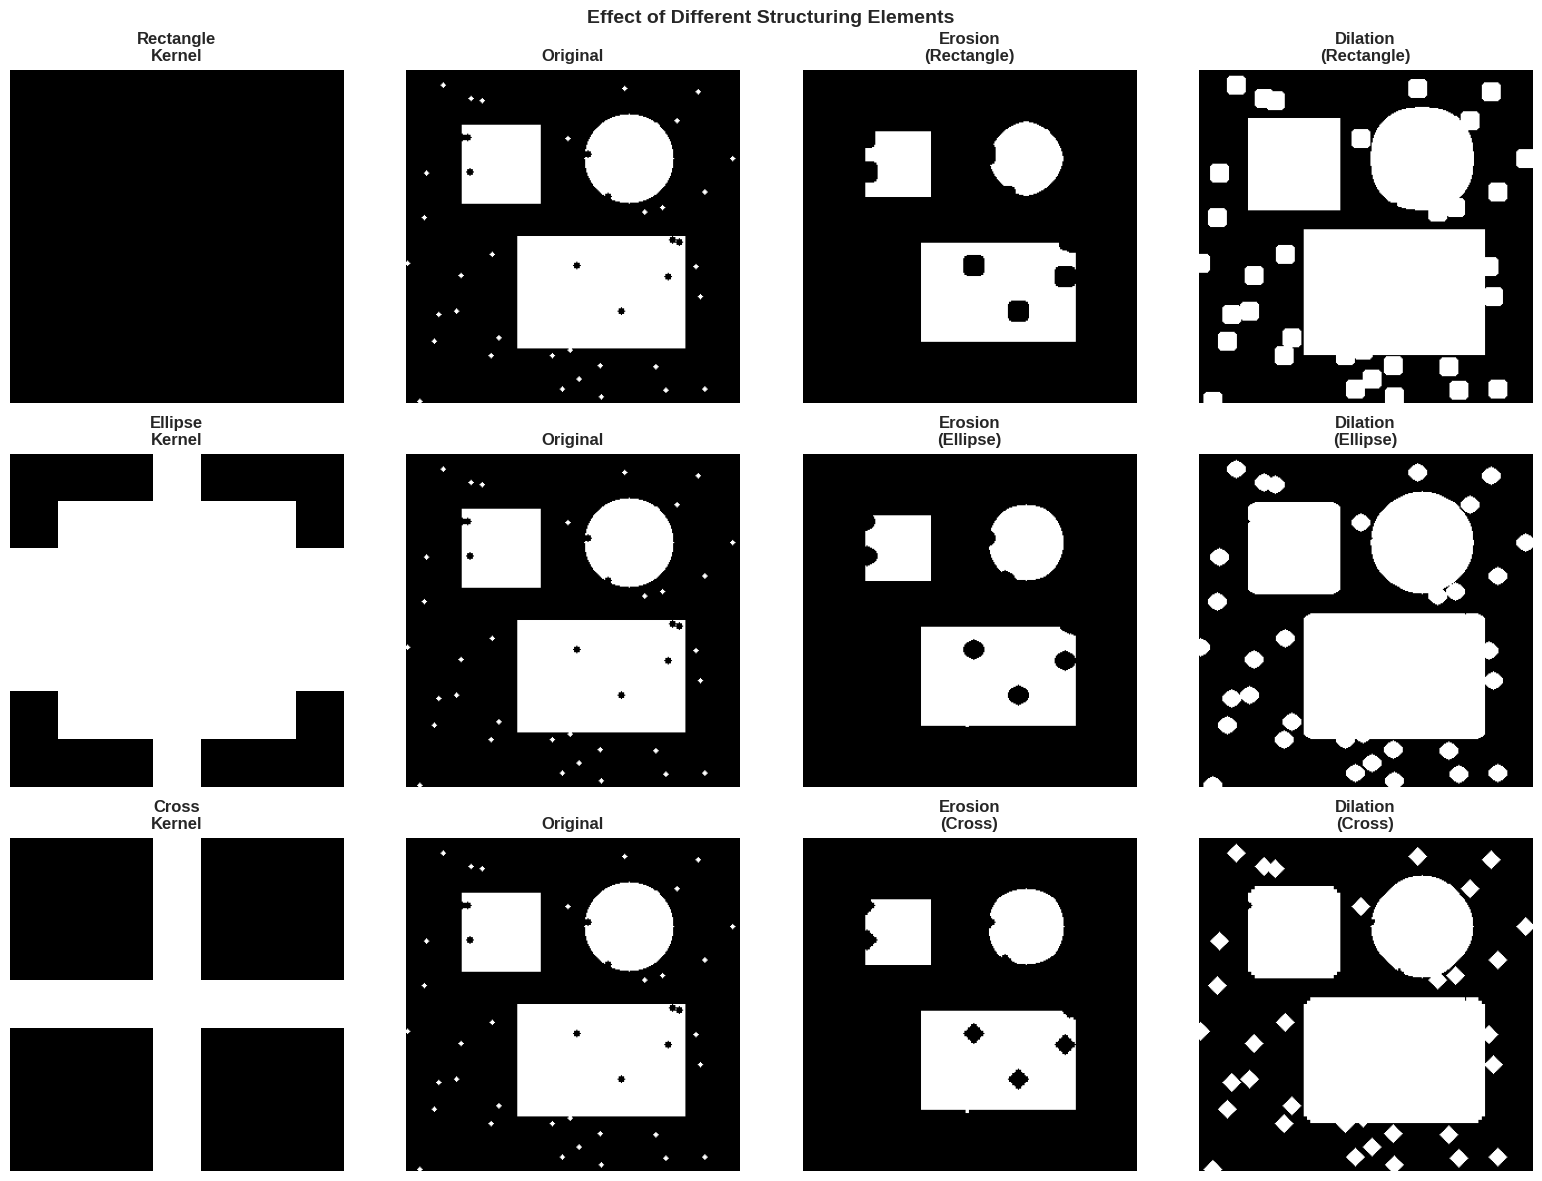

In [10]:
# Compare different structuring elements
print("Effect of Different Structuring Elements")
print("="*50)

# Different structuring elements
shapes = [
    (cv2.MORPH_RECT, 'Rectangle'),
    (cv2.MORPH_ELLIPSE, 'Ellipse'),
    (cv2.MORPH_CROSS, 'Cross')
]

fig, axes = plt.subplots(3, 4, figsize=(16, 12))

for i, (shape, name) in enumerate(shapes):
    kernel = cv2.getStructuringElement(shape, (7, 7))
    
    # Show kernel
    axes[i, 0].imshow(kernel, cmap='gray', interpolation='nearest')
    axes[i, 0].set_title(f'{name}\nKernel', fontweight='bold')
    axes[i, 0].axis('off')
    
    # Original
    axes[i, 1].imshow(morph_img, cmap='gray')
    axes[i, 1].set_title('Original', fontweight='bold')
    axes[i, 1].axis('off')
    
    # Erosion
    eroded = cv2.erode(morph_img, kernel, iterations=2)
    axes[i, 2].imshow(eroded, cmap='gray')
    axes[i, 2].set_title(f'Erosion\n({name})', fontweight='bold')
    axes[i, 2].axis('off')
    
    # Dilation
    dilated = cv2.dilate(morph_img, kernel, iterations=2)
    axes[i, 3].imshow(dilated, cmap='gray')
    axes[i, 3].set_title(f'Dilation\n({name})', fontweight='bold')
    axes[i, 3].axis('off')
    
    print(f"\n{name} Kernel (7x7):\n{kernel}")

plt.suptitle('Effect of Different Structuring Elements', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 2.3 Opening and Closing

Opening and closing are compound operations that combine erosion and dilation.

#### Opening

**Mathematical Definition:**
$$
A \circ B = (A \ominus B) \oplus B
$$

Opening = Erosion followed by Dilation

**Effects:**
- Removes small objects and noise
- Smooths object boundaries
- Breaks thin connections between objects
- Preserves the size and shape of larger objects

**OpenCV Function:**
```python
cv2.morphologyEx(src, cv2.MORPH_OPEN, kernel, iterations)
```

#### Closing

**Mathematical Definition:**
$$
A \bullet B = (A \oplus B) \ominus B
$$

Closing = Dilation followed by Erosion

**Effects:**
- Fills small holes in objects
- Connects nearby objects
- Smooths object boundaries
- Preserves the size and shape of larger objects

**OpenCV Function:**
```python
cv2.morphologyEx(src, cv2.MORPH_CLOSE, kernel, iterations)
```

Opening and Closing Operations

Iteration 1:
  Opening - Foreground pixels: 24971
  Closing - Foreground pixels: 25503

Iteration 2:
  Opening - Foreground pixels: 24896
  Closing - Foreground pixels: 25779

Iteration 3:
  Opening - Foreground pixels: 24735
  Closing - Foreground pixels: 25902


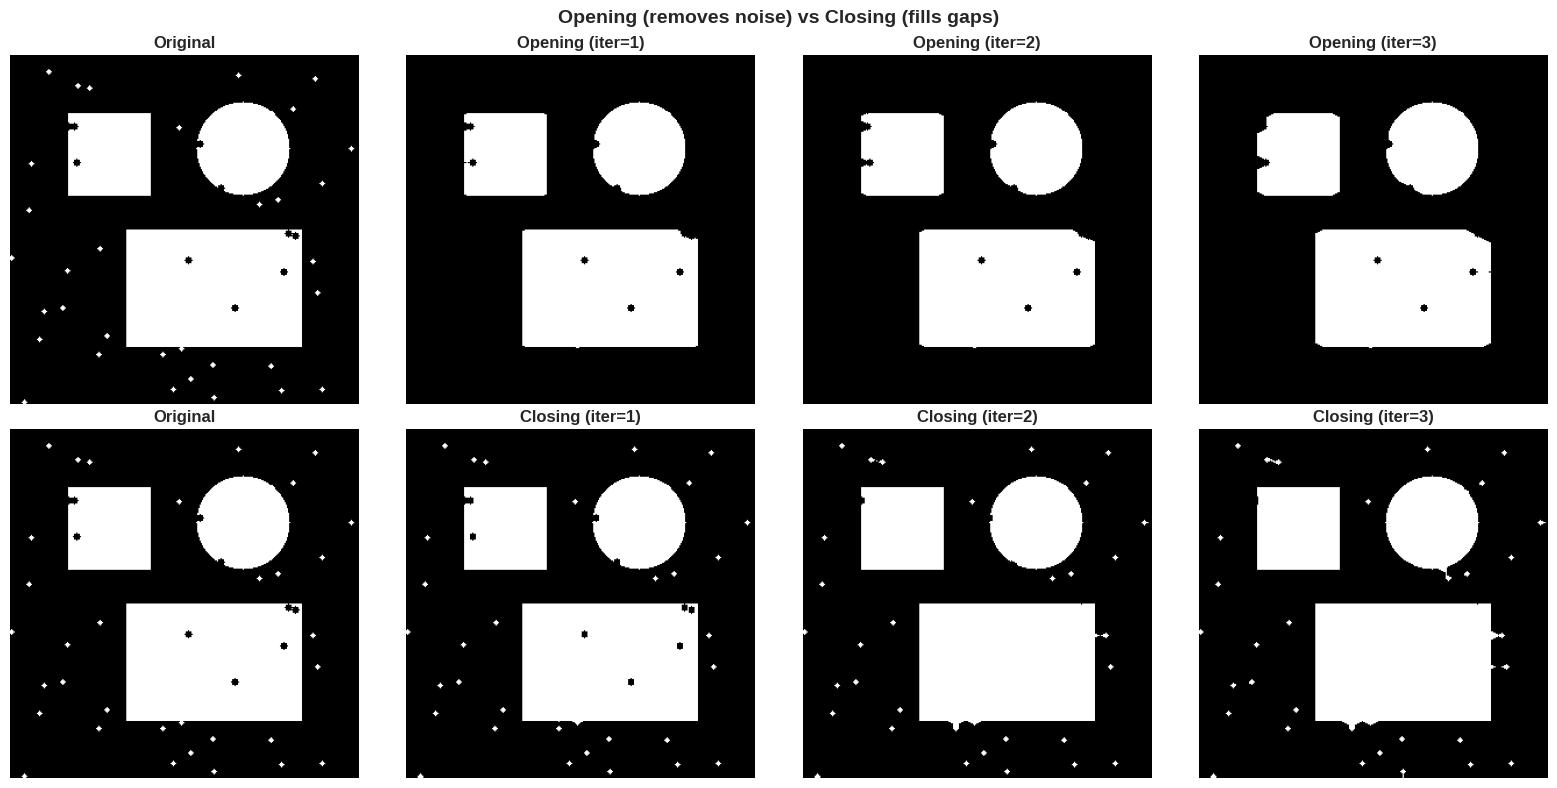

In [11]:
# Demonstration: Opening and Closing
print("Opening and Closing Operations")
print("="*50)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Progressive opening
opening_results = []
closing_results = []

for iters in [0, 1, 2, 3]:
    if iters == 0:
        opening = morph_img.copy()
        closing = morph_img.copy()
    else:
        opening = cv2.morphologyEx(morph_img, cv2.MORPH_OPEN, kernel, iterations=iters)
        closing = cv2.morphologyEx(morph_img, cv2.MORPH_CLOSE, kernel, iterations=iters)
        
        print(f"\nIteration {iters}:")
        print(f"  Opening - Foreground pixels: {np.sum(opening > 0)}")
        print(f"  Closing - Foreground pixels: {np.sum(closing > 0)}")
    
    opening_results.append(opening)
    closing_results.append(closing)

# Display results
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i in range(4):
    # Opening
    axes[0, i].imshow(opening_results[i], cmap='gray')
    title = 'Original' if i == 0 else f'Opening (iter={i})'
    axes[0, i].set_title(title, fontweight='bold')
    axes[0, i].axis('off')
    
    # Closing
    axes[1, i].imshow(closing_results[i], cmap='gray')
    title = 'Original' if i == 0 else f'Closing (iter={i})'
    axes[1, i].set_title(title, fontweight='bold')
    axes[1, i].axis('off')

plt.suptitle('Opening (removes noise) vs Closing (fills gaps)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Step-by-Step: Opening and Closing


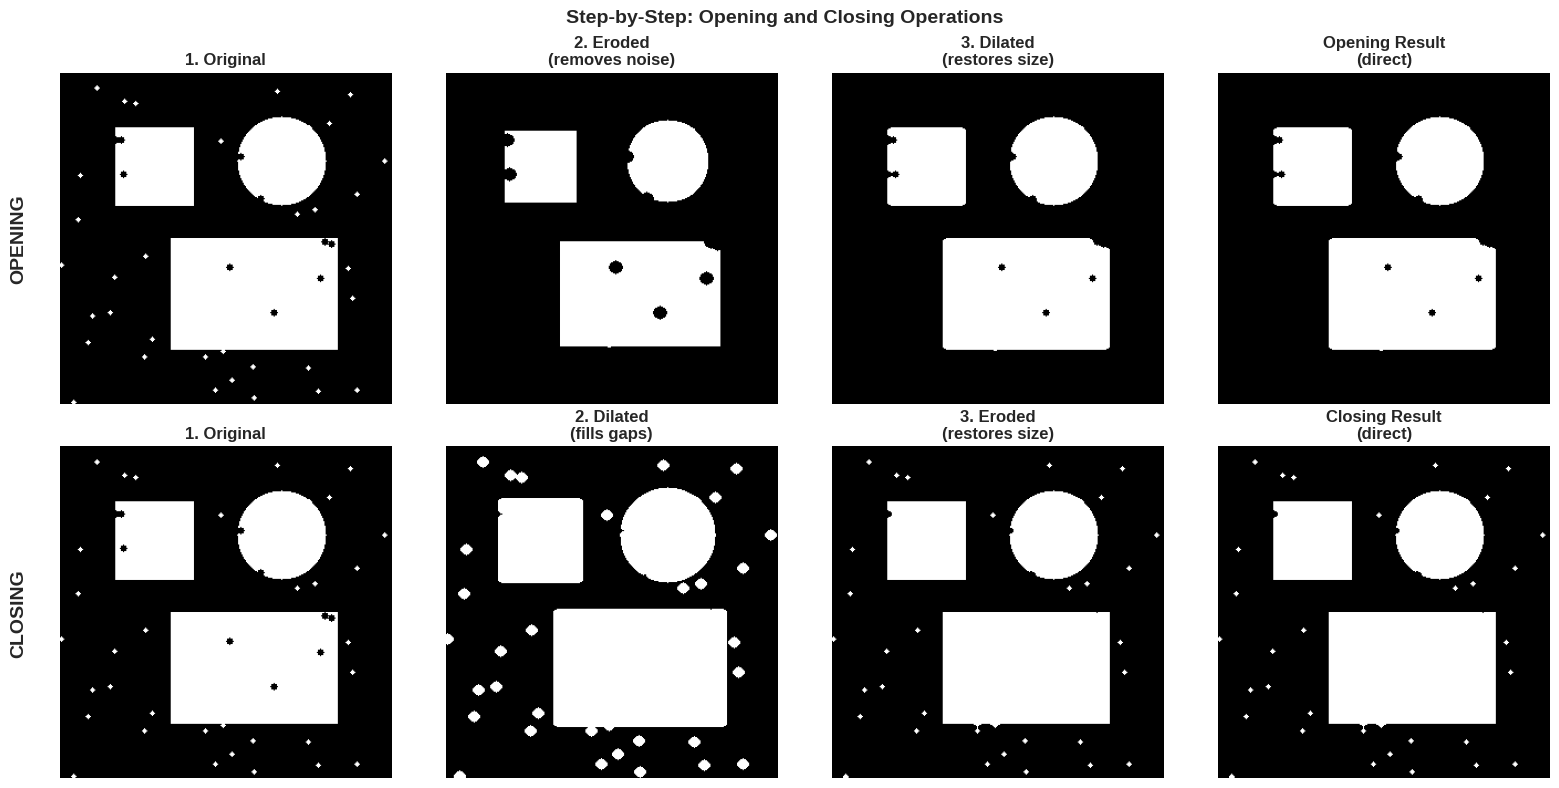

In [12]:
# Demonstrate the step-by-step process
print("Step-by-Step: Opening and Closing")
print("="*50)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

# Opening steps
eroded = cv2.erode(morph_img, kernel, iterations=1)
opened = cv2.dilate(eroded, kernel, iterations=1)
opened_direct = cv2.morphologyEx(morph_img, cv2.MORPH_OPEN, kernel)

# Closing steps
dilated = cv2.dilate(morph_img, kernel, iterations=1)
closed = cv2.erode(dilated, kernel, iterations=1)
closed_direct = cv2.morphologyEx(morph_img, cv2.MORPH_CLOSE, kernel)

# Display
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Opening process
axes[0, 0].imshow(morph_img, cmap='gray')
axes[0, 0].set_title('1. Original', fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(eroded, cmap='gray')
axes[0, 1].set_title('2. Eroded\n(removes noise)', fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(opened, cmap='gray')
axes[0, 2].set_title('3. Dilated\n(restores size)', fontweight='bold')
axes[0, 2].axis('off')

axes[0, 3].imshow(opened_direct, cmap='gray')
axes[0, 3].set_title('Opening Result\n(direct)', fontweight='bold')
axes[0, 3].axis('off')

# Closing process
axes[1, 0].imshow(morph_img, cmap='gray')
axes[1, 0].set_title('1. Original', fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(dilated, cmap='gray')
axes[1, 1].set_title('2. Dilated\n(fills gaps)', fontweight='bold')
axes[1, 1].axis('off')

axes[1, 2].imshow(closed, cmap='gray')
axes[1, 2].set_title('3. Eroded\n(restores size)', fontweight='bold')
axes[1, 2].axis('off')

axes[1, 3].imshow(closed_direct, cmap='gray')
axes[1, 3].set_title('Closing Result\n(direct)', fontweight='bold')
axes[1, 3].axis('off')

axes[0, 0].text(-0.15, 0.5, 'OPENING', transform=axes[0, 0].transAxes,
                fontsize=14, fontweight='bold', va='center', rotation=90)
axes[1, 0].text(-0.15, 0.5, 'CLOSING', transform=axes[1, 0].transAxes,
                fontsize=14, fontweight='bold', va='center', rotation=90)

plt.suptitle('Step-by-Step: Opening and Closing Operations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## 3. Histogram Equalization

### Mathematical Explanation

Histogram equalization enhances image contrast by redistributing pixel intensities to utilize the full dynamic range.

#### Histogram

For a grayscale image with intensity levels $[0, L-1]$, the histogram is:

$$
h(i) = \text{number of pixels with intensity } i
$$

#### Probability Density Function (PDF)

$$
p(i) = \frac{h(i)}{N}
$$

where $N$ is the total number of pixels.

#### Cumulative Distribution Function (CDF)

$$
c(i) = \sum_{j=0}^{i} p(j)
$$

#### Equalization Transform

The equalized intensity for pixel with original intensity $i$ is:

$$
s_i = \text{round}\left( (L-1) \cdot c(i) \right)
$$

**Intuition:**
- The CDF maps the original intensities to new intensities
- Spreads out the most frequent intensity values
- Results in approximately uniform histogram
- Enhances contrast, especially in low-contrast images

**OpenCV Function:**
```python
cv2.equalizeHist(src)
```
- `src`: Input 8-bit grayscale image
- Returns: Equalized image

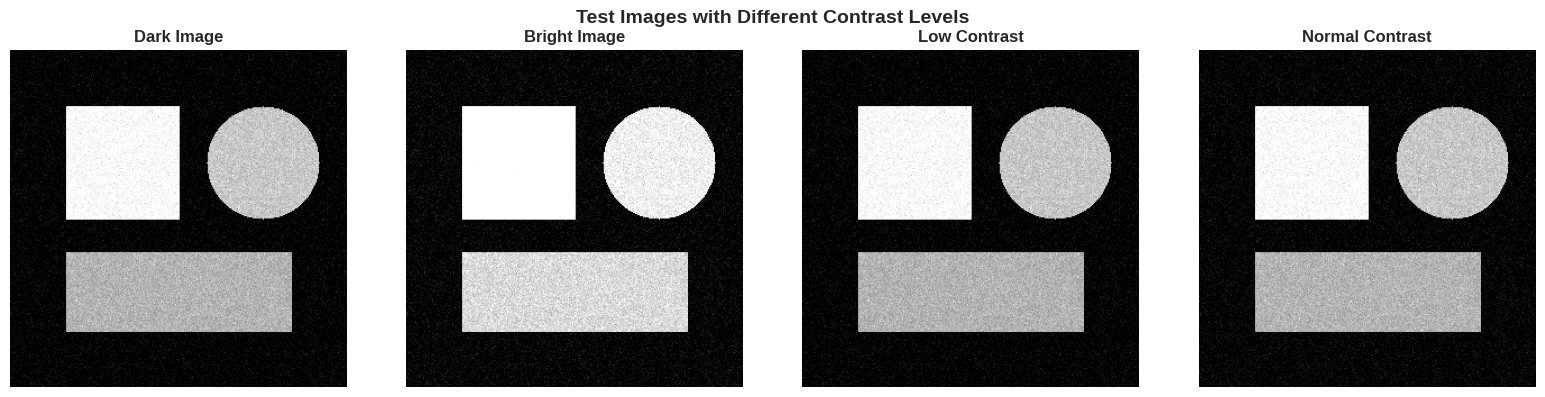

In [14]:
# Create low-contrast images for demonstration
def create_low_contrast_images():
    """Create images with varying contrast levels"""
    images = []
    
    # Image 1: Dark image (low intensities)
    img1 = (sample_img * 0.3).astype(np.uint8)
    images.append(('Dark Image', img1))
    
    # Image 2: Bright image (high intensities)
    img2 = np.clip(sample_img * 0.5 + 150, 0, 255).astype(np.uint8)
    images.append(('Bright Image', img2))
    
    # Image 3: Low contrast (narrow intensity range)
    img3 = ((sample_img / 255.0) * 100 + 75).astype(np.uint8)
    images.append(('Low Contrast', img3))
    
    # Image 4: Normal contrast
    images.append(('Normal Contrast', sample_img))
    
    return images

test_images = create_low_contrast_images()

# Display test images
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i, (title, img) in enumerate(test_images):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title, fontweight='bold')
    axes[i].axis('off')
plt.suptitle('Test Images with Different Contrast Levels', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Histogram Equalization


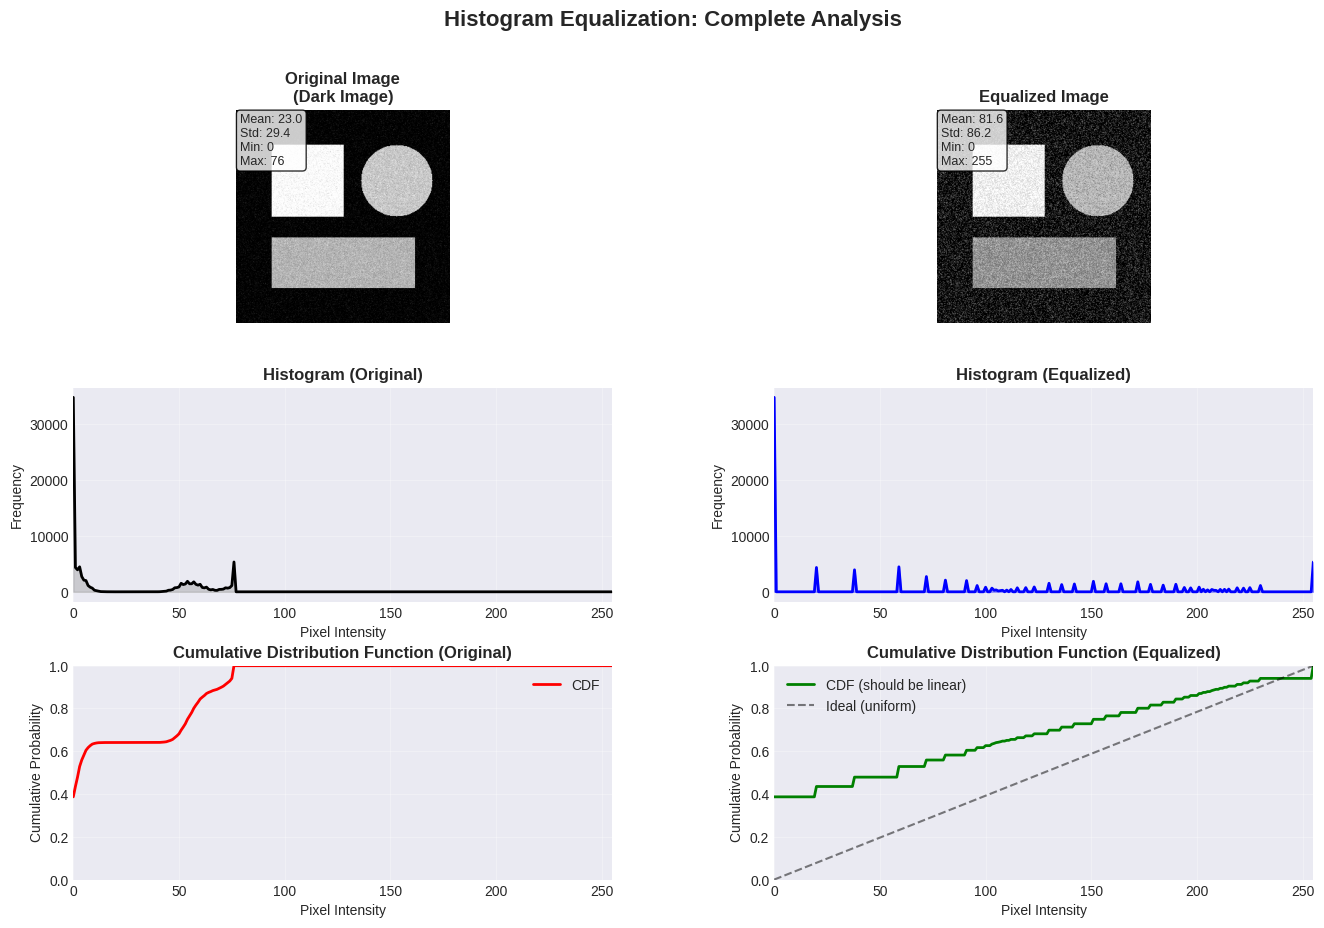


Original Image Statistics:
  Mean intensity: 23.02
  Std deviation: 29.41
  Min intensity: 0
  Max intensity: 76

Equalized Image Statistics:
  Mean intensity: 81.56
  Std deviation: 86.15
  Min intensity: 0
  Max intensity: 255


In [15]:
# Demonstrate histogram equalization
print("Histogram Equalization")
print("="*50)

# Select one image for detailed demonstration
demo_title, demo_img = test_images[0]  # Dark image

# Apply histogram equalization
equalized = cv2.equalizeHist(demo_img)

# Calculate histograms
hist_original = cv2.calcHist([demo_img], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized], [0], None, [256], [0, 256])

# Calculate CDFs
cdf_original = hist_original.cumsum()
cdf_original = cdf_original / cdf_original[-1]  # Normalize

cdf_equalized = hist_equalized.cumsum()
cdf_equalized = cdf_equalized / cdf_equalized[-1]  # Normalize

# Display results
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Original image
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(demo_img, cmap='gray')
ax1.set_title(f'Original Image\n({demo_title})', fontweight='bold', fontsize=12)
ax1.axis('off')
stats_orig = f'Mean: {demo_img.mean():.1f}\nStd: {demo_img.std():.1f}\nMin: {demo_img.min()}\nMax: {demo_img.max()}'
ax1.text(0.02, 0.98, stats_orig, transform=ax1.transAxes, 
         fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Equalized image
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(equalized, cmap='gray')
ax2.set_title('Equalized Image', fontweight='bold', fontsize=12)
ax2.axis('off')
stats_eq = f'Mean: {equalized.mean():.1f}\nStd: {equalized.std():.1f}\nMin: {equalized.min()}\nMax: {equalized.max()}'
ax2.text(0.02, 0.98, stats_eq, transform=ax2.transAxes, 
         fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Histogram of original
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(hist_original, color='black', linewidth=2)
ax3.fill_between(range(256), hist_original.flatten(), alpha=0.3, color='gray')
ax3.set_title('Histogram (Original)', fontweight='bold', fontsize=12)
ax3.set_xlabel('Pixel Intensity')
ax3.set_ylabel('Frequency')
ax3.grid(True, alpha=0.3)
ax3.set_xlim([0, 255])

# Histogram of equalized
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(hist_equalized, color='blue', linewidth=2)
ax4.fill_between(range(256), hist_equalized.flatten(), alpha=0.3, color='blue')
ax4.set_title('Histogram (Equalized)', fontweight='bold', fontsize=12)
ax4.set_xlabel('Pixel Intensity')
ax4.set_ylabel('Frequency')
ax4.grid(True, alpha=0.3)
ax4.set_xlim([0, 255])

# CDF of original
ax5 = fig.add_subplot(gs[2, 0])
ax5.plot(cdf_original, color='red', linewidth=2, label='CDF')
ax5.set_title('Cumulative Distribution Function (Original)', fontweight='bold', fontsize=12)
ax5.set_xlabel('Pixel Intensity')
ax5.set_ylabel('Cumulative Probability')
ax5.grid(True, alpha=0.3)
ax5.set_xlim([0, 255])
ax5.set_ylim([0, 1])
ax5.legend()

# CDF of equalized
ax6 = fig.add_subplot(gs[2, 1])
ax6.plot(cdf_equalized, color='green', linewidth=2, label='CDF (should be linear)')
ax6.plot([0, 255], [0, 1], 'k--', alpha=0.5, label='Ideal (uniform)')
ax6.set_title('Cumulative Distribution Function (Equalized)', fontweight='bold', fontsize=12)
ax6.set_xlabel('Pixel Intensity')
ax6.set_ylabel('Cumulative Probability')
ax6.grid(True, alpha=0.3)
ax6.set_xlim([0, 255])
ax6.set_ylim([0, 1])
ax6.legend()

plt.suptitle('Histogram Equalization: Complete Analysis', fontsize=16, fontweight='bold')
plt.show()

print(f"\nOriginal Image Statistics:")
print(f"  Mean intensity: {demo_img.mean():.2f}")
print(f"  Std deviation: {demo_img.std():.2f}")
print(f"  Min intensity: {demo_img.min()}")
print(f"  Max intensity: {demo_img.max()}")

print(f"\nEqualized Image Statistics:")
print(f"  Mean intensity: {equalized.mean():.2f}")
print(f"  Std deviation: {equalized.std():.2f}")
print(f"  Min intensity: {equalized.min()}")
print(f"  Max intensity: {equalized.max()}")

Histogram Equalization on All Test Images

Dark Image:
  Before - Mean: 23.0, Std: 29.4, Range: [0, 76]
  After  - Mean: 81.6, Std: 86.2, Range: [0, 255]

Bright Image:
  Before - Mean: 186.4, Std: 45.4, Range: [150, 255]
  After  - Mean: 87.9, Std: 91.3, Range: [0, 255]

Low Contrast:
  Before - Mean: 105.2, Std: 38.5, Range: [75, 175]
  After  - Mean: 83.0, Std: 86.0, Range: [0, 255]

Normal Contrast:
  Before - Mean: 77.8, Std: 98.4, Range: [0, 255]
  After  - Mean: 86.0, Std: 86.1, Range: [0, 255]


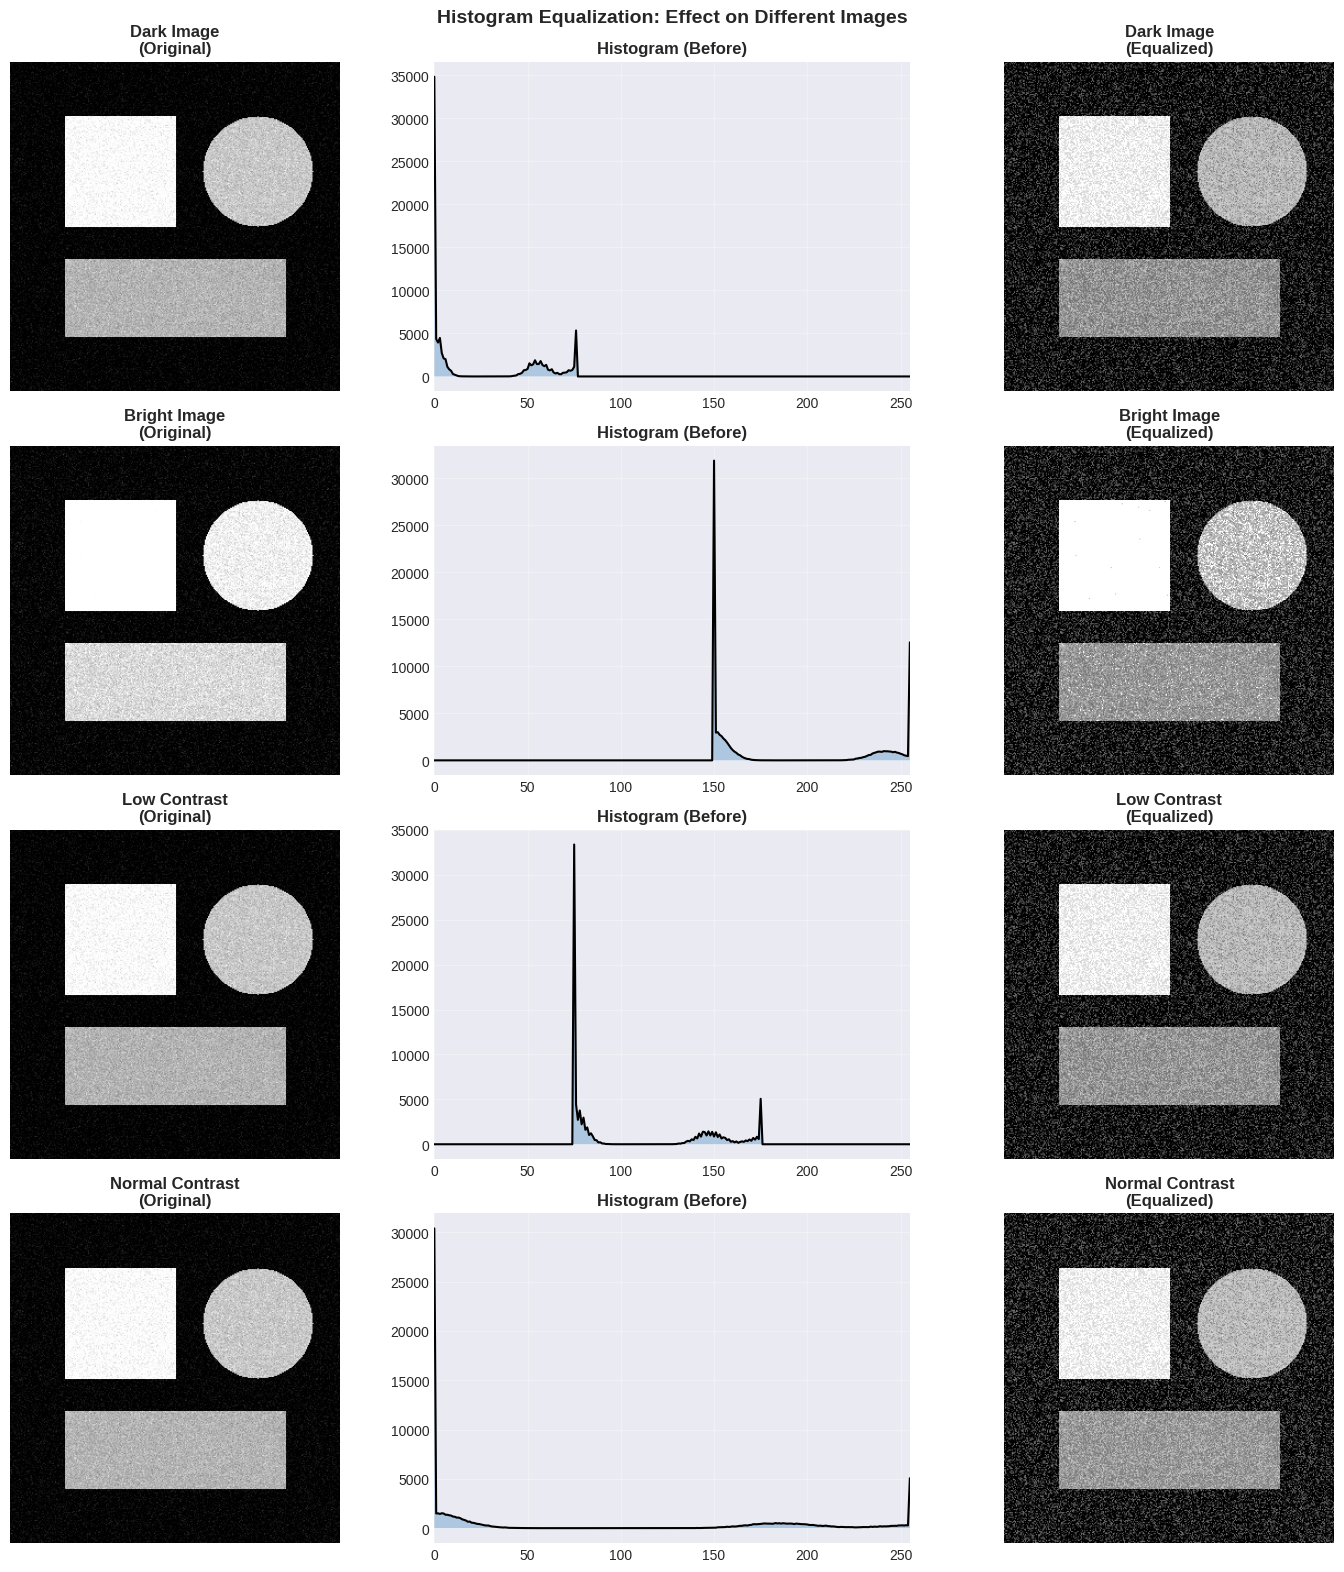

In [16]:
# Apply histogram equalization to all test images
print("Histogram Equalization on All Test Images")
print("="*50)

fig, axes = plt.subplots(4, 3, figsize=(15, 16))

for i, (title, img) in enumerate(test_images):
    # Apply equalization
    equalized = cv2.equalizeHist(img)
    
    # Calculate histograms
    hist_orig = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist_eq = cv2.calcHist([equalized], [0], None, [256], [0, 256])
    
    # Original image
    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].set_title(f'{title}\n(Original)', fontweight='bold')
    axes[i, 0].axis('off')
    
    # Original histogram
    axes[i, 1].plot(hist_orig, color='black', linewidth=1.5)
    axes[i, 1].fill_between(range(256), hist_orig.flatten(), alpha=0.3)
    axes[i, 1].set_title('Histogram (Before)', fontweight='bold')
    axes[i, 1].set_xlim([0, 255])
    axes[i, 1].grid(True, alpha=0.3)
    
    # Equalized image
    axes[i, 2].imshow(equalized, cmap='gray')
    axes[i, 2].set_title(f'{title}\n(Equalized)', fontweight='bold')
    axes[i, 2].axis('off')
    
    print(f"\n{title}:")
    print(f"  Before - Mean: {img.mean():.1f}, Std: {img.std():.1f}, Range: [{img.min()}, {img.max()}]")
    print(f"  After  - Mean: {equalized.mean():.1f}, Std: {equalized.std():.1f}, Range: [{equalized.min()}, {equalized.max()}]")

plt.suptitle('Histogram Equalization: Effect on Different Images', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### CLAHE: Contrast Limited Adaptive Histogram Equalization

CLAHE is an advanced version of histogram equalization that:
- Divides the image into small tiles
- Applies histogram equalization to each tile
- Limits contrast amplification to prevent noise amplification

**Mathematical Concept:**

For each tile, the histogram is clipped at a threshold:
$$
h'(i) = \min(h(i), \text{clip\_limit})
$$

The excess pixels are redistributed uniformly across all intensity levels.

**OpenCV Function:**
```python
clahe = cv2.createCLAHE(clipLimit, tileGridSize)
result = clahe.apply(src)
```
- `clipLimit`: Threshold for contrast limiting (default: 40.0)
- `tileGridSize`: Size of grid for histogram equalization (e.g., (8,8))

CLAHE: Contrast Limited Adaptive Histogram Equalization
CLAHE with clip limit: 1.0
CLAHE with clip limit: 2.0
CLAHE with clip limit: 4.0
CLAHE with clip limit: 8.0


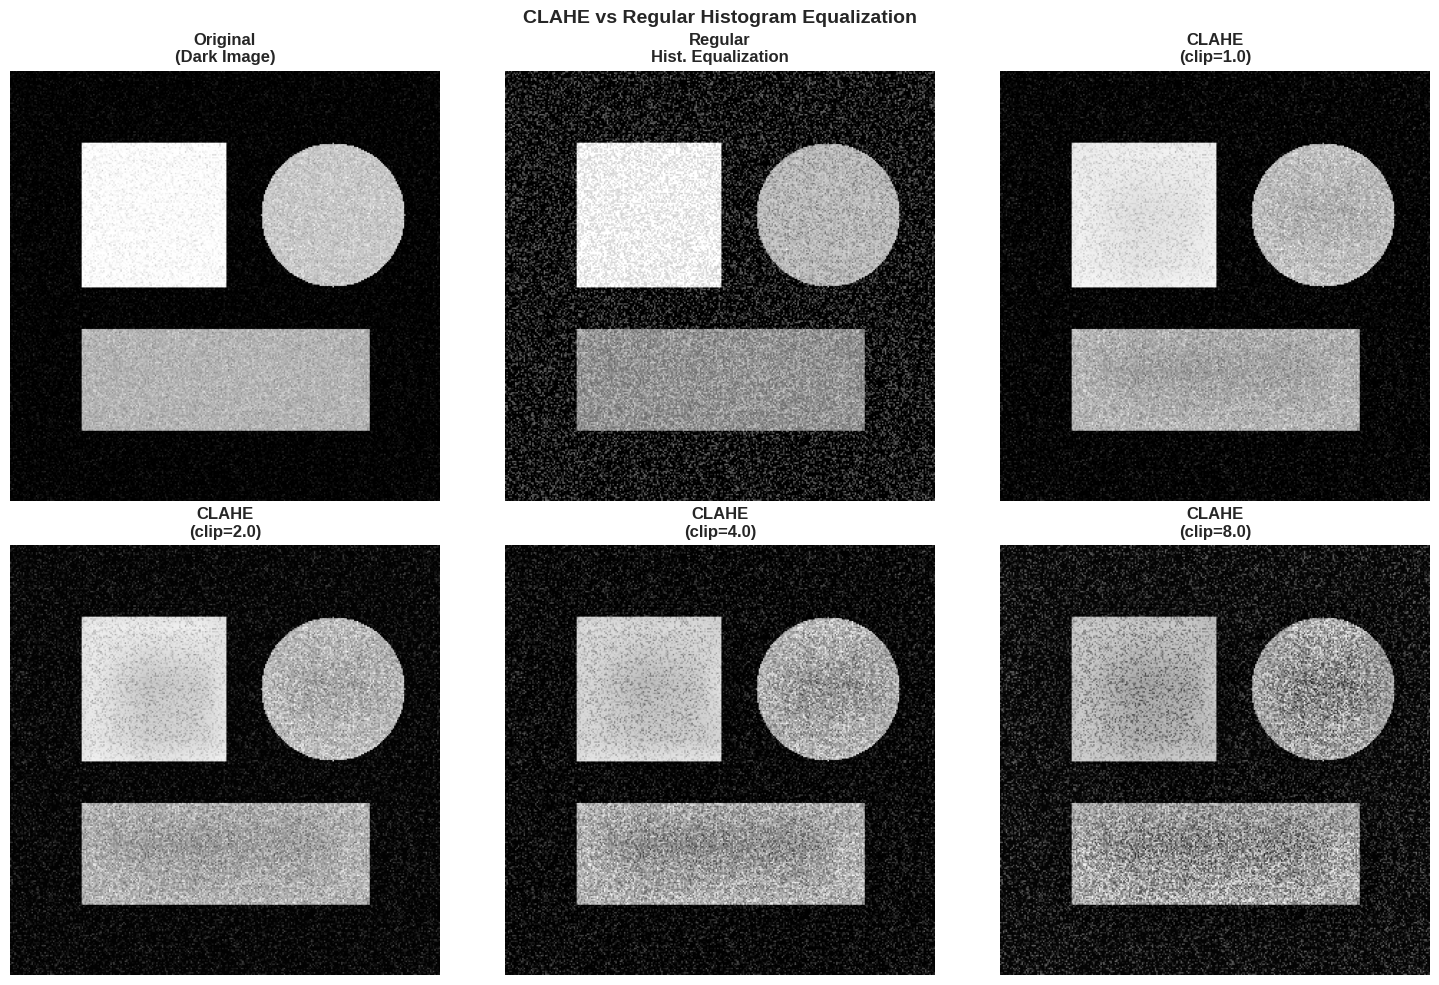

In [17]:
# Demonstrate CLAHE with different parameters
print("CLAHE: Contrast Limited Adaptive Histogram Equalization")
print("="*60)

# Use the dark image
demo_img = test_images[0][1]

# Different CLAHE configurations
clip_limits = [1.0, 2.0, 4.0, 8.0]
results = []

# Regular histogram equalization for comparison
hist_eq = cv2.equalizeHist(demo_img)

for clip_limit in clip_limits:
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8, 8))
    clahe_result = clahe.apply(demo_img)
    results.append(clahe_result)
    print(f"CLAHE with clip limit: {clip_limit}")

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Original
axes[0].imshow(demo_img, cmap='gray')
axes[0].set_title('Original\n(Dark Image)', fontweight='bold')
axes[0].axis('off')

# Regular histogram equalization
axes[1].imshow(hist_eq, cmap='gray')
axes[1].set_title('Regular\nHist. Equalization', fontweight='bold')
axes[1].axis('off')

# CLAHE results
for i, (result, clip_limit) in enumerate(zip(results, clip_limits)):
    axes[i+2].imshow(result, cmap='gray')
    axes[i+2].set_title(f'CLAHE\n(clip={clip_limit})', fontweight='bold')
    axes[i+2].axis('off')

plt.suptitle('CLAHE vs Regular Histogram Equalization', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## Summary

This notebook covered fundamental image processing operations:

### 1. Filtering and Convolution
- **Gaussian Blur**: Smooths images using a Gaussian kernel $G(x,y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2+y^2}{2\sigma^2}}$
- **Sobel Operator**: Detects edges by computing image gradients $G = \sqrt{G_x^2 + G_y^2}$

### 2. Morphological Operations
- **Erosion** $(A \ominus B)$: Shrinks objects, removes noise
- **Dilation** $(A \oplus B)$: Expands objects, fills gaps
- **Opening** $(A \circ B) = (A \ominus B) \oplus B$: Removes small objects
- **Closing** $(A \bullet B) = (A \oplus B) \ominus B$: Fills small holes

### 3. Histogram Equalization
- **Regular**: Uses CDF to redistribute intensities uniformly
- **CLAHE**: Adaptive version with contrast limiting for better results

### Key Takeaways
- All operations can be tuned with parameters (kernel size, sigma, iterations, etc.)
- Understanding the mathematics helps in choosing appropriate parameters
- Different operations are suited for different tasks and image characteristics
- Combining operations (e.g., blur before edge detection) often yields better results